Description:
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded here.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly 
import plotly.graph_objects as go
import plotly.express as pe 
import plotly.offline as po
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


In [8]:
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

In [9]:
from xgboost import XGBClassifier

In [67]:
#!pip install imblearn

In [68]:
from imblearn.combine import SMOTETomek

In [10]:
#loading dataset 
df=pd.read_csv(r"C:\Users\shree\Downloads\adult.csv")

In [11]:
#top 5 records 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
#finding any null 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [17]:
df=df.replace("?",np.nan)

In [18]:
df.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [19]:
#Let's quantify the percentage of missing values in each variable:
df.isnull().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

In [20]:
df.duplicated().sum()

24

In [21]:
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Quantifying missing data')

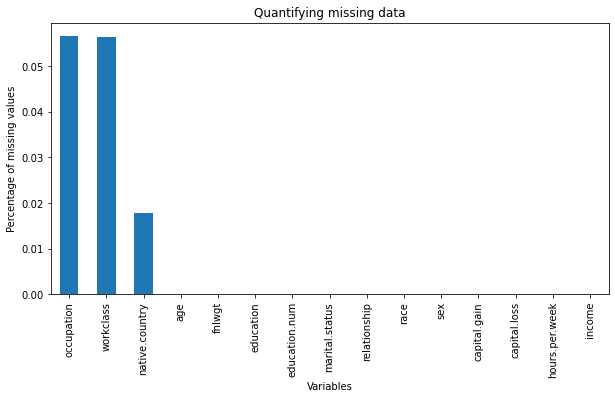

In [22]:
#Finally, let's make a bar plot with the percentage of missing values per variable:
df.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [23]:
Numerical_Features=[num for num in df.columns if df[num].dtypes!='O']
Numerical_Features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [24]:
Categorical_Features=[num for num in df.columns if df[num].dtypes=='O']
Categorical_Features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

Text(0.5, 1.0, 'Cardinality')

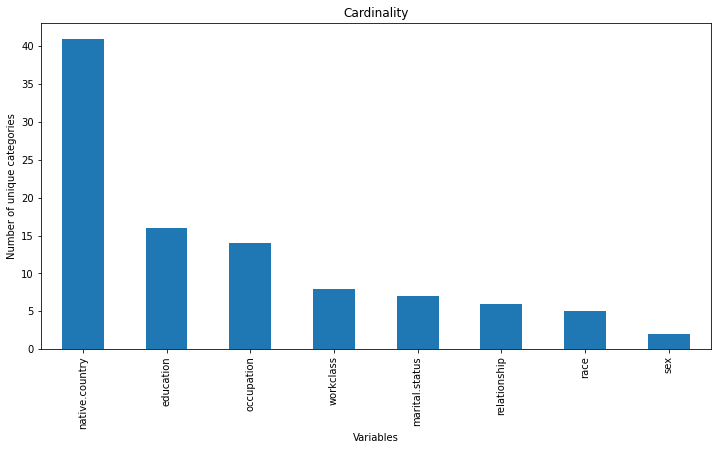

In [25]:
#Finding the cardinality of categorical Features inside dataframe
df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']].nunique().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')


In [26]:
#Native country has maximum distinct values

In [27]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [28]:
#Since the column education and education.num represent the same information in the dataset we must have to reduce redundancy we will drop column education.num column from the dataset 
df.drop(columns=['education.num'],axis=1,inplace=True)

In [29]:
#Lets see the distribution of our target variable income
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

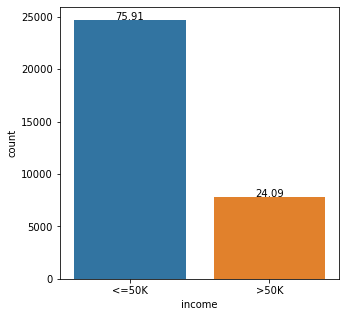

In [30]:
plt.figure(figsize=(5,5))
total = float(len(df) )
ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [31]:
#it clearly shows our dataset is imbalanced .we will make it balanced later on before that we see some analysis 

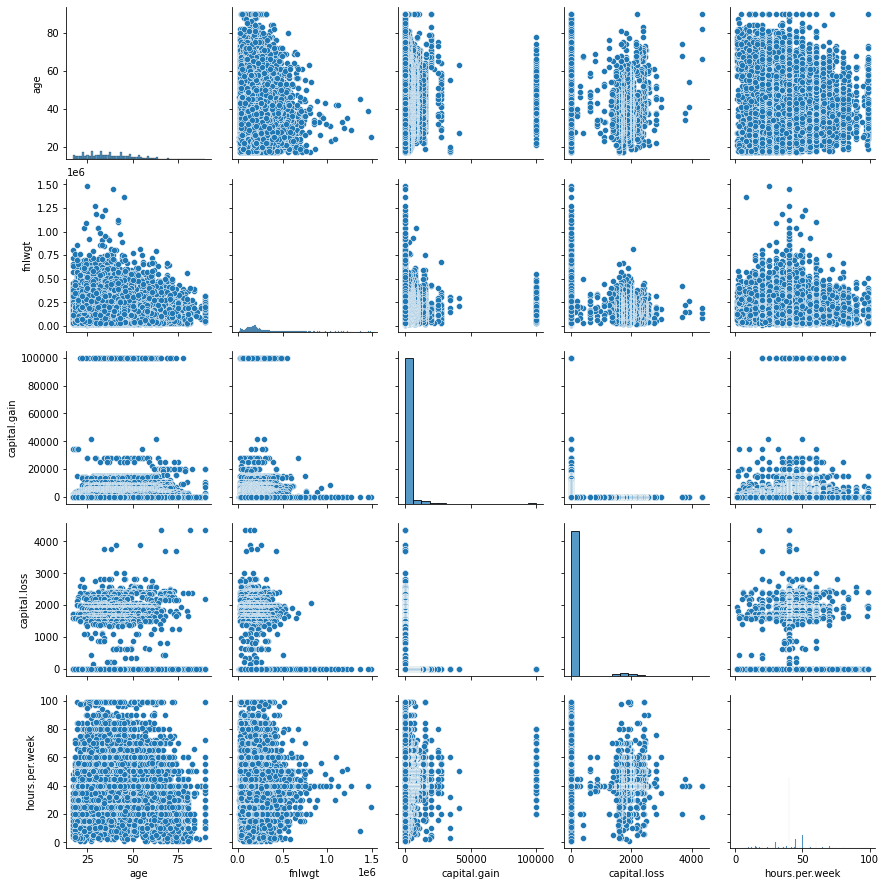

In [32]:
sns.pairplot(df)

Univariate Analysis 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital.gain'}>,
        <AxesSubplot:title={'center':'capital.loss'}>],
       [<AxesSubplot:title={'center':'hours.per.week'}>, <AxesSubplot:>]],
      dtype=object)

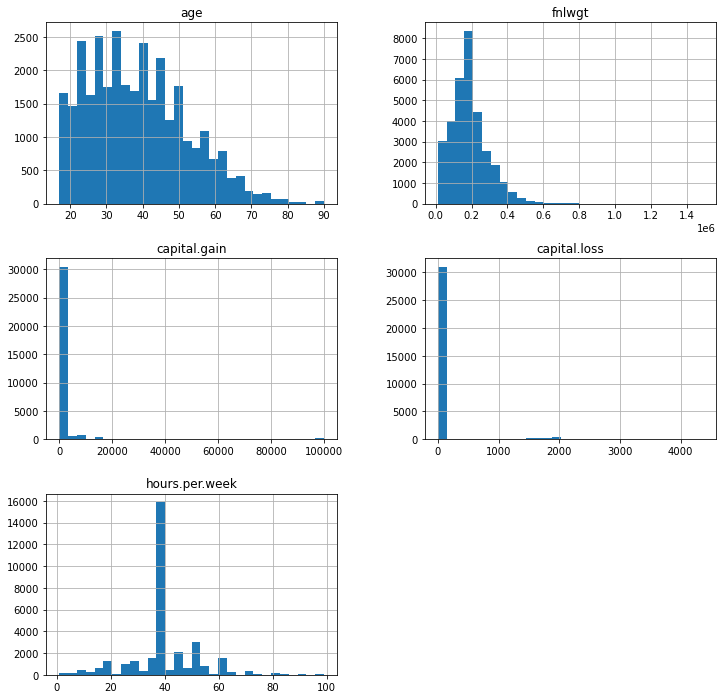

In [33]:
#Finding the normal distribution of Numerical Features inside the dataframe 
df.hist(bins=30, figsize=(12,12))

WORKCLASS DISTRIBUTION :

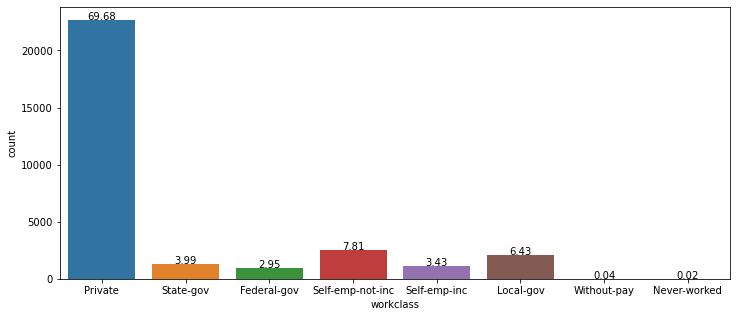

In [34]:
plt.figure(figsize=(12,5))
total = float(len(df['income']) )
ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [35]:
#most of them belong to private workclass that is around 69.70%. without-play and never-play workclass has min count

EDUCATION DISTRIBUTION :

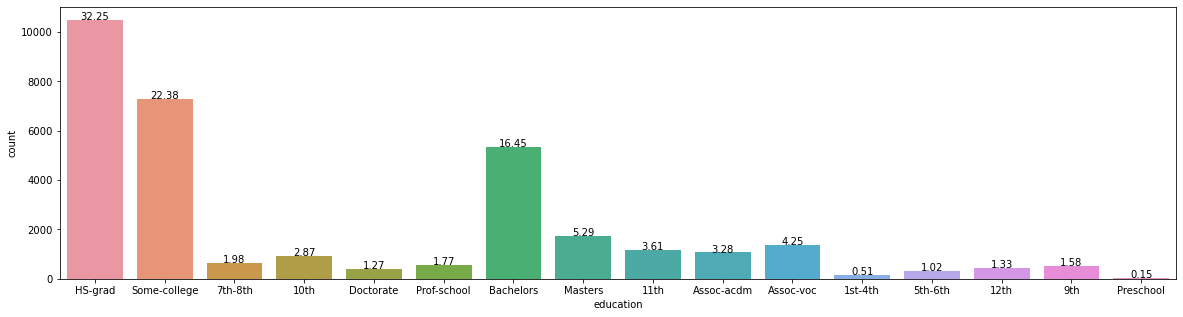

In [36]:
plt.figure(figsize=(20,5))
total = float(len(df['income']) )
ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [37]:
#HS_grad has the highest percentage of income where as preschool has lowest 

MARITAL STATUS DISTRIBUTION :

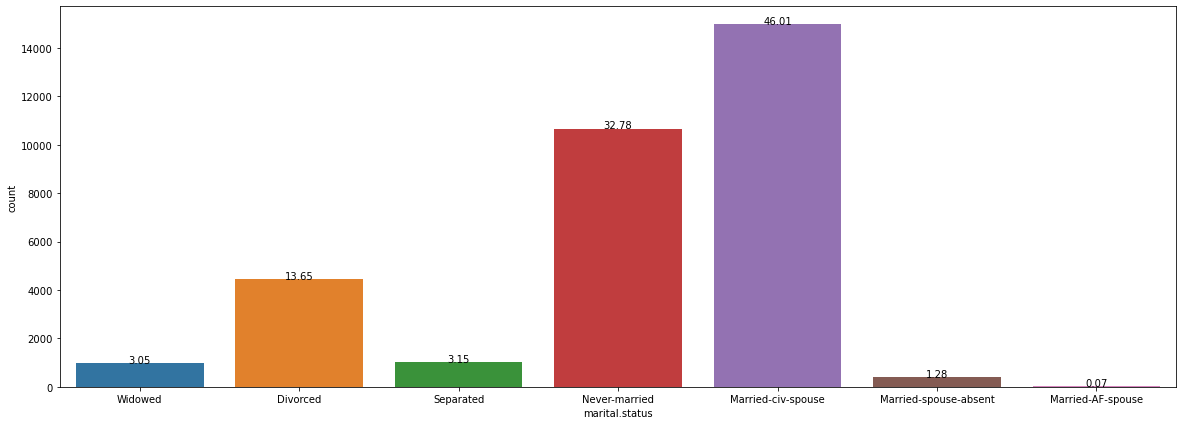

In [38]:
plt.figure(figsize=(20,7))
total = float(len(df['income']) )
ax = sns.countplot(x="marital.status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [39]:
#Married-civ-spouse has maximum number of samples. Married-AF-spouse has minimum number of obs.

OCCUPATION DISTRIBUTION :

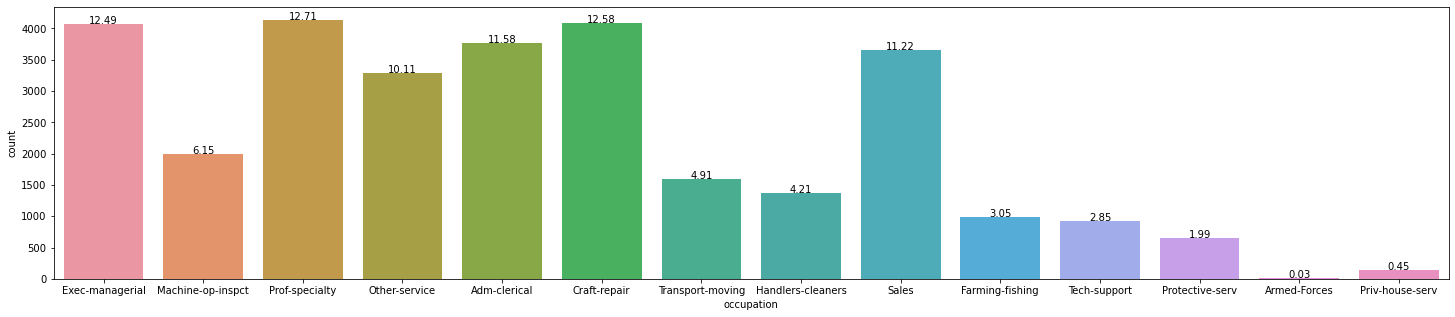

In [40]:
plt.figure(figsize=(25,5))
total = float(len(df['income']) )
ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [41]:
#

RELATIONSHIP  DISTRIBUTION :

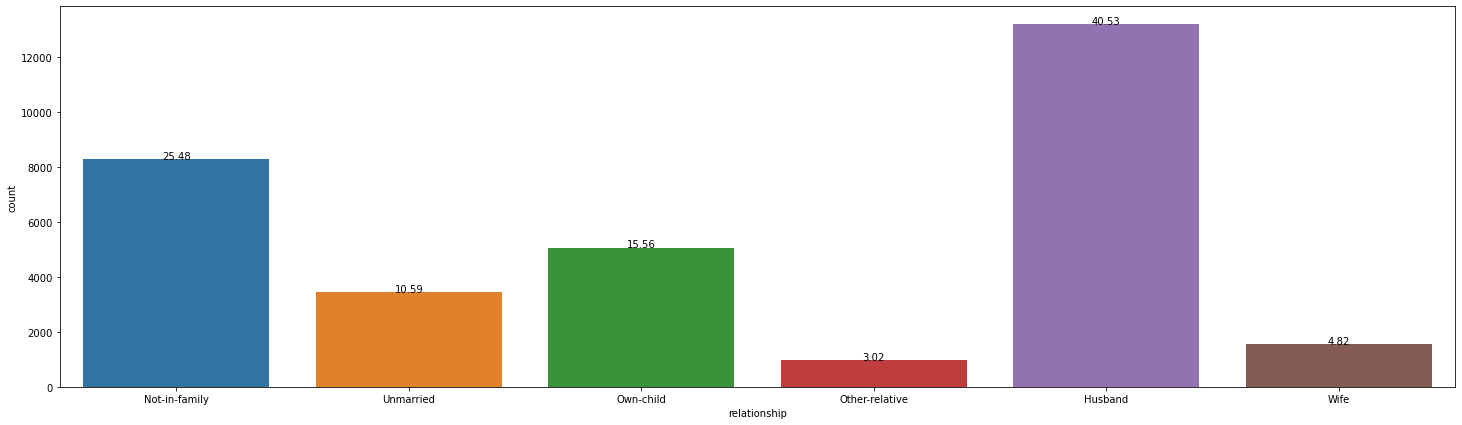

In [42]:
plt.figure(figsize=(25,7))
total = float(len(df['income']) )
ax = sns.countplot(x='relationship', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [43]:
#in the relationship category Husband has highest percentage of income 

RACE DISTRIBUTION :

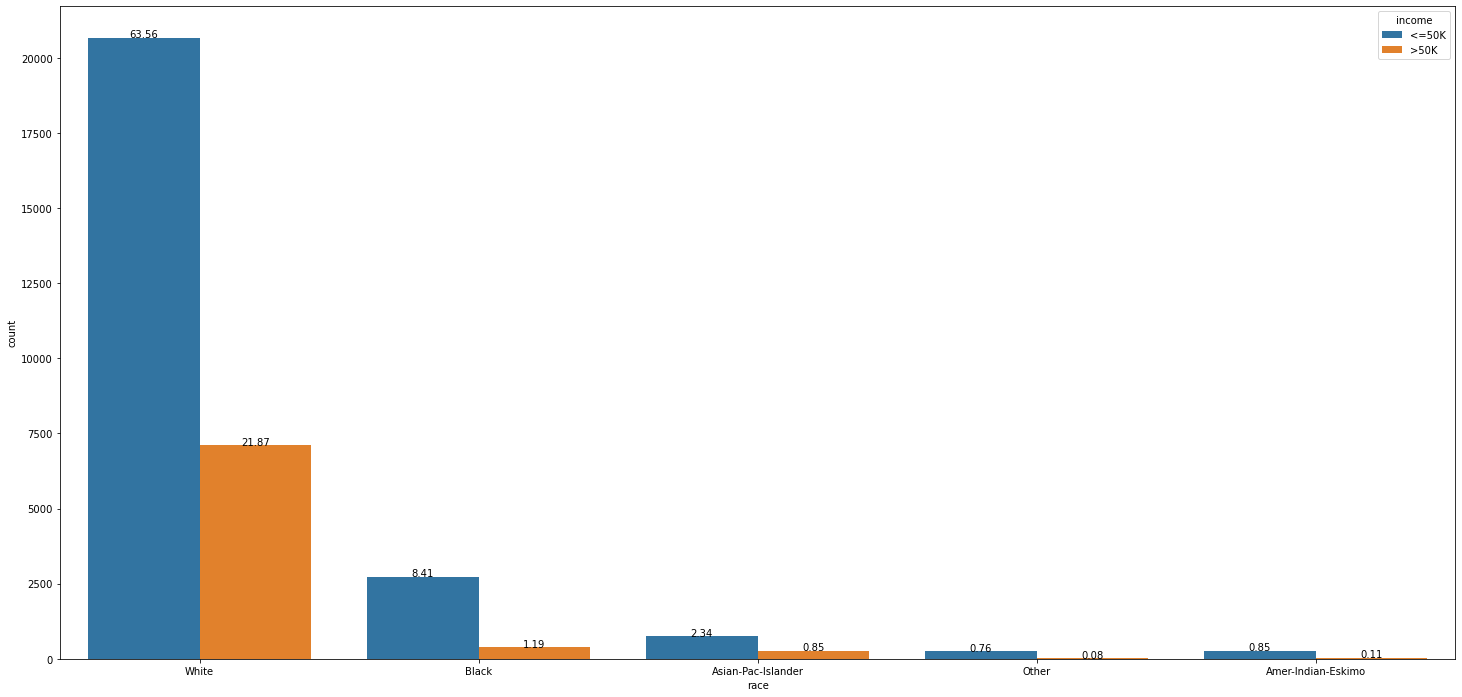

In [44]:
plt.figure(figsize=(25,12))
total = float(len(df['income']) )
ax = sns.countplot(x='race', data=df,hue='income')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [45]:
#inside the race category the category White has highest percentage of income than in any other category 

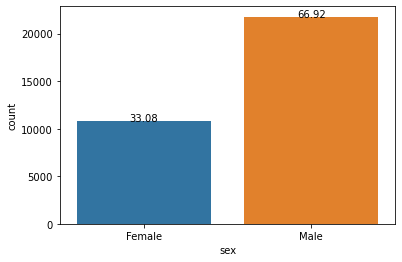

In [46]:
plt.figure(figsize=(6,4))
total = float(len(df['income']) )
ax = sns.countplot(x='sex', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [47]:
#Male has highest percentage of income as compared to Female income 

COUNTRYWISE INCOME DISTRIBUTION:

In [48]:
df_country_income=df.groupby(['native.country'])['income'].count().sort_values(ascending=False).reset_index()
df_country_income

,native.country,income
0,United-States,29153
1,Mexico,639
2,Philippines,198
3,Germany,137
4,Canada,121
5,Puerto-Rico,114
6,El-Salvador,106
7,India,100
8,Cuba,95
9,England,90


In [49]:
df.groupby(['native.country'])['income'].count().sort_values(ascending=False)

native.country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [50]:
pd.crosstab(df['native.country'],columns=df['income'],margins=True).sort_values(by='native.country',ascending=False)

income,<=50K,>50K,All
native.country,,,
Yugoslavia,10,6,16
Vietnam,62,5,67
United-States,21984,7169,29153
Trinadad&Tobago,17,2,19
Thailand,15,3,18
Taiwan,31,20,51
South,64,16,80
Scotland,9,3,12
Puerto-Rico,102,12,114


In [51]:
#From the among contry Uniteed States has highest count of people who has more than 50K of their anual salary(7171)

BIVARIATE ANALYSIS :

<AxesSubplot:xlabel='capital.gain', ylabel='capital.loss'>

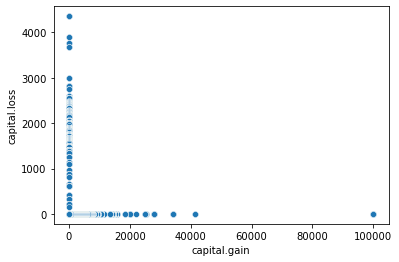

In [52]:
sns.scatterplot(x=df['capital.gain'],y=df['capital.loss'])

<AxesSubplot:xlabel='income', ylabel='age'>

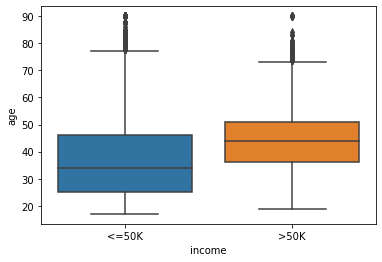

In [53]:
sns.boxplot(y=df['age'],x=df['income'])

In [54]:
#Most of people between age 35 to 50 age group earns salry greater than 50 K

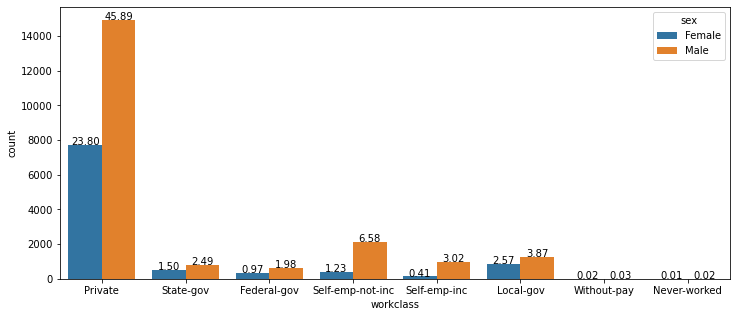

In [55]:
plt.figure(figsize=(12,5))
total = float(len(df['income']) )
ax = sns.countplot(x="workclass", data=df,hue='sex')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

posx and posy should be finite values
posx and posy should be finite values


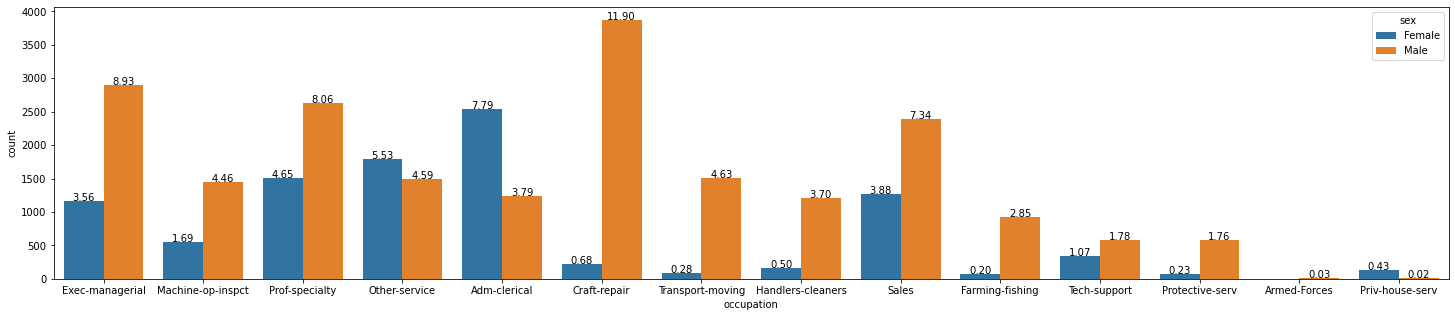

In [56]:
plt.figure(figsize=(25,5))
total = float(len(df['income']) )
ax = sns.countplot(x="occupation", data=df,hue='sex')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

DATA PREPROCESSING

In [57]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [58]:
#lets treat the missing values 
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [63]:
df_copy=df.copy()

In [64]:
df_copy.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [70]:
df_copy['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [71]:
#Before doing any preprocessing on features lets separate the target variable from dataset 
x=df_copy.drop('income',axis=1)
x.shape

(32537, 13)

In [72]:
y=df_copy['income']
y.shape

(32537,)

In [79]:
#lets handle nan (missing values) by simple imputer
simple_imputer=SimpleImputer(strategy='most_frequent')

In [80]:
X=simple_imputer.fit_transform(x)

Label Encoding :

In [81]:
#Lets do the label encoding for our targeted feature i.e income (y)
label_encoder=LabelEncoder()

In [82]:
y=label_encoder.fit_transform(y)

In [83]:
#lets do the label encoding for rest of the festures (workclass,education,marital.status,occupation,race,relationship,sex)
le_work=LabelEncoder()
le_marital=LabelEncoder()
le_occu=LabelEncoder()
le_race=LabelEncoder()
le_rel=LabelEncoder()
le_sex=LabelEncoder()

In [84]:
x['workclass']=le_work.fit_transform(x['workclass'])

In [85]:
x['marital.status']=le_marital.fit_transform(x['marital.status'])
x['occupation']=le_occu.fit_transform(x['occupation'])
x['race']=le_race.fit_transform(x['race'])
x['relationship']=le_rel.fit_transform(x['relationship'])
x['sex']=le_sex.fit_transform(x['sex'])

In [86]:
x

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,77053,HS-grad,6,14,1,4,0,0,4356,40,United-States
1,82,3,132870,HS-grad,6,3,1,4,0,0,4356,18,United-States
2,66,8,186061,Some-college,6,14,4,2,0,0,4356,40,United-States
3,54,3,140359,7th-8th,0,6,4,4,0,0,3900,40,United-States
4,41,3,264663,Some-college,5,9,3,4,0,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,Some-college,4,10,1,4,1,0,0,40,United-States
32557,27,3,257302,Assoc-acdm,2,12,5,4,0,0,0,38,United-States
32558,40,3,154374,HS-grad,2,6,0,4,1,0,0,40,United-States
32559,58,3,151910,HS-grad,6,0,4,4,0,0,0,40,United-States


In [87]:
le_edu=LabelEncoder()
le_native=LabelEncoder()

In [88]:
x['education']=le_edu.fit_transform(x['education'])
x['native.country']=le_native.fit_transform(x['native.country'])

In [89]:
x.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,77053,11,6,14,1,4,0,0,4356,40,38
1,82,3,132870,11,6,3,1,4,0,0,4356,18,38
2,66,8,186061,15,6,14,4,2,0,0,4356,40,38
3,54,3,140359,5,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,5,9,3,4,0,0,3900,40,38


In [ ]:
#Now our almost all features are transformed except some features like age,fnlwgt,capital.loss,capital.gain,hours.per.week lets do some feature scaling

HANDLING IMBALANCED DATASET :

#To handle the imbalanced dataset lets do experiemnets 


1:Undersampling :Incase of undersampling we try to reduce the majority class points:

In [92]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [93]:
ns=NearMiss(0.8)

In [101]:
ns_x,ns_y=ns.fit_resample(x,y)
print("No of classes before fit{}".format(Counter(y)))
print("No of classes After fit{}".format(Counter(ns_y)))
#Some how we are able to handle imbalanced dataset 

No of classes before fitCounter({0: 24698, 1: 7839})
No of classes After fitCounter({0: 9798, 1: 7839})


OverSampling Technique:

In [102]:
from imblearn.over_sampling import RandomOverSampler

In [104]:
ns1=RandomOverSampler(0.4)
ns1_x,ns1_y=ns1.fit_resample(x,y)
print("No of classes before fit{}".format(Counter(y)))
print("No of classes After fit{}".format(Counter(ns1_y)))

No of classes before fitCounter({0: 24698, 1: 7839})
No of classes After fitCounter({0: 24698, 1: 9879})


USING SMOTE :
    SMOTE(Synthetic Minority Oversampling Technique) is a machine learning technique that solves problems that occur when using an imbalanced data set. Imbalanced data sets often occur in practice, and it is crucial to master the tools needed to work with this type of data.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

In [105]:
from imblearn.combine import SMOTETomek

In [106]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(x, y)

Splitting Dataset into Train set and Test Set

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42,test_size=0.2)

In [109]:
X_train.shape

(35926, 13)

In [110]:
X_test.shape

(8982, 13)

Feature Scailing 

In [111]:
standard_scaler=StandardScaler()

In [112]:
X_train=standard_scaler.fit_transform(X_train)

In [113]:
X_test=standard_scaler.transform(X_test)

In [114]:
#now our dataset has splitted into train test set lets do the model building since it is classification Model we will varify its accuracy using different algorithms

In [133]:
lr=LogisticRegression() #Logistic Regression
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 
print("Model is created")

Model is created


We are using almost 7 models. Now its time to train out model.

In [134]:
lr.fit(X_train, y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [137]:
lr_yprad = lr.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [138]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[3236 1200]
 [ 954 3592]]


In [139]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[3754  682]
 [ 664 3882]]


In [140]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[3973  463]
 [ 466 4080]]


In [141]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)


confusion matrix for lr_model 
 [[3809  627]
 [ 577 3969]]


In [142]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[3593  843]
 [ 471 4075]]


In [143]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[3856  580]
 [ 493 4053]]


In [144]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[4028  408]
 [ 460 4086]]


Checking classification report for each model:

In [146]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)
print("-----------------------------------------------------------------")
dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)
print("-----------------------------------------------------------------")
rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)
print("-----------------------------------------------------------------")
adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)
print("-----------------------------------------------------------------")
svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)
print("-----------------------------------------------------------------")
gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)
print("-----------------------------------------------------------------")
xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      4436
           1       0.75      0.79      0.77      4546

    accuracy                           0.76      8982
   macro avg       0.76      0.76      0.76      8982
weighted avg       0.76      0.76      0.76      8982

-----------------------------------------------------------------
 dt classification_report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4436
           1       0.85      0.85      0.85      4546

    accuracy                           0.85      8982
   macro avg       0.85      0.85      0.85      8982
weighted avg       0.85      0.85      0.85      8982

-----------------------------------------------------------------
 rf classification_report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4436
           1       0.

In [147]:
#it shows XGBoost classifier is best suited model for above dataset 

ROC AUC Curve:
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [149]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and checking the roc_auc_score
print(f"ROC_AUC curve score for logistic regression-->{roc_auc_score(y_test,lr.predict(X_test))}")
print(f"ROC_AUC curve score for Desition Tree Classifier-->{roc_auc_score(y_test,dt.predict(X_test))}")
print(f"ROC_AUC curve score for Random Forest Classifier-->{roc_auc_score(y_test,rf.predict(X_test))}")
print(f"ROC_AUC curve score for AdaboostClaasifier -->{roc_auc_score(y_test,adb.predict(X_test))}")
print(f"ROC_AUC curve score for Support Vector Classifier-->{roc_auc_score(y_test,svm.predict(X_test))}")
print(f"ROC_AUC curve score for Gradient Boosting Claasifier-->{roc_auc_score(y_test,gdboost.predict(X_test))}")
print(f"ROC_AUC curve score for XGBoost Classifier-->{roc_auc_score(y_test,xgboost.predict(X_test))}")

ROC_AUC curve score for logistic regression-->0.7598156030113177
ROC_AUC curve score for Desition Tree Classifier-->0.8500977087438415
ROC_AUC curve score for Random Forest Classifier-->0.8965594958181212
ROC_AUC curve score for AdaboostClaasifier -->0.865865839111029
ROC_AUC curve score for Support Vector Classifier-->0.8531781821889218
ROC_AUC curve score for Gradient Boosting Claasifier-->0.88040229581828
ROC_AUC curve score for XGBoost Classifier-->0.90341869525702


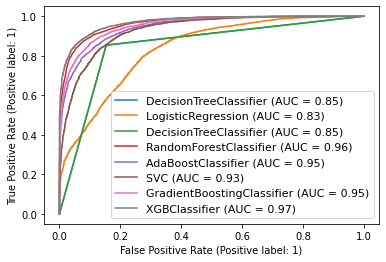

In [150]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

K-Fold Cross Validation :
    
    
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 3 folds (K = 3). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation every time.

In [151]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [152]:
print("Mean of Cross validation score for gdboost  model==>",cross_val_score(gdboost,X_train,y_train,cv=5).mean())
print("Cross validation score for xgboost model==>",cross_val_score(xgboost,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rf,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for AdaboostClassfier",cross_val_score(adb,X_train,y_train,cv=5).mean())

Mean of Cross validation score for gdboost  model==> 0.8778601010508913
Cross validation score for xgboost model==> 0.9004342705341575
Mean of cross validation score for Random Forest model==> 0.892334131490889
Mean of cross validation score for AdaboostClassfier 0.8660580216577467


In [153]:
#After cross validation the XGBoost Classifier gives the best reuslt Hence it is well suited model for our dataset 

In [154]:
#Lets do the hyper parameter Tuning

In [155]:
from sklearn.model_selection import GridSearchCV

In [157]:
xgboost.get_params().keys()#to check the parameter :

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [170]:
parm_grid  = {'max_depth' : [4,5],
              'subsample' : [0.6,0.8],
              'learning_rate': [0.2],
              'min_child_weight' : [1,3],
              'random_state' : [4,6]}

In [171]:
#Giving these parameter to our suited model XGBoost classifier so that we can tune our model with new parameters 
gridsearchCv=GridSearchCV(estimator=xgboost,param_grid=parm_grid,cv=5)

In [172]:
#Fit the model with gridsearchCV
gridsearchCv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'learning_rate': [0.2], 'max_depth': [4, 5],
                         'min_child_weight': [1, 3], 'random_state': [4, 6],
                         'subsample': [0.6, 0.8]})

In [173]:
#Training the model 
gridsearchCv.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'random_state': 6,
 'subsample': 0.8}

In [174]:
xgb_tuned_model=XGBClassifier(learning_rate=0.1,
 max_depth=4,
 min_child_weight=1,
 random_state=5,
 subsample=.8)

In [175]:
xgb_tuned_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
#predicting the values using test data
xgboost_tuning_yprad = xgb_tuned_model.predict(X_test)

In [177]:
#printing the classification report
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4436
           1       0.88      0.90      0.89      4546

    accuracy                           0.89      8982
   macro avg       0.89      0.89      0.89      8982
weighted avg       0.89      0.89      0.89      8982



In [179]:
#Saving model:
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(xgb_tuned_model,open(Census_model,'wb'))